In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import random
import time
import os
from IPython.display import display
import matplotlib.pyplot as plt

# Comparative Study of Dynamic Programming and Genetic Algorithms for the Solution of 0/1 Knapsack Problem

### Author Ivan Georgiev

## Abstract 

The 0/1 Knapsack Problem involves selecting a subset of items, each with a given weight and value, to maximize total value without exceeding a capacity limit. In this project, we analyze two distinct solution approaches: Dynamic Programming (DP), which guarantees an optimal result, and Genetic Algorithms (GA), a heuristic approach inspired by natural evolution. Our main goal is to evaluate their performance and present a comparative study in terms of runtime and solution quality across varying problem sizes. Our experiments reveal that DP excels on smaller instances due to its precision, while GA offers greater scalability for larger instances at the expense of guaranteed optimality. These findings are consistent with previous work done on 0/1 Knapsack solutions. Our results highlight the trade-offs between exact and approximate methods, providing insights when a fast, heuristic GA is preferable to the exact but more computationally intensive DP approach.

*The 0/1 Knapsack Problem, involves selecting a subset of items with given weights and values to maximize total value without exceeding a capacity limit. In this project we will analyze two distinct approaches to solving this challange: Dynamic Programming (DP), which guarantees an optimal solution, and Genetic Algorithms (GA), a heuristic method inspired by natural evolution. Our main goal is to evaluate their performance and to present a comparative study in terms of runtime and solution quality across varying problem sizes. Our experiments reveal that DP excels in smaller instances with its precision, while GA offers scalability for larger instances at the cost of optimality. These findings are consistent with the prevuious work done on 0/1 Knapsack Problem solutions. Our results also highlight the trade-offs between exact and approximate methods, providing insights when a fast, heuristic GA is preferable to the exact but more computationally intensive DP approach.*
*The existing body of research strongly supports our initial hypothesis. The consistent findings across various studies provide a solid foundation for our experimental design and analysis proposed. The recurring theme in the literature highlights the expected strengths of DP for smaller problem instances as well as the potential of GA to provide efficient, high-quality solutions for larger instances where DP becomes less practical due to its computational demands. 

*Along the way we will discuss the mathematics behind our code and suggest little tests here and there to see if what we have implemented up to that point works as expected. We will be trying to explain our thought process and provide examples to elucidate the ideas being discussed. An attempt is made to cover everything in such a way that minimal prior knowledge would be required to follow and and replicate our results. Once we have something simple that works we will discuss possible improvements and try to implement some ot them.*

## 1.Introduction 

The 0/1 Knapsack Problem is a classic challenge in combinatorial optimization. Given $n$ items, each with weight $w_i$ and value $v_i$, the goal is to select a subset that fits within a total weight capacity $W$ while maximizing total value. The “0/1” constraint means each item is either included or excluded—no partial selections are allowed. This problem has both theoretical significance and practical impact. Applications range from budget allocation under financial constraints to load planning in logistics and resource distribution in project management. Because of its wide-ranging relevance, finding efficient solution methods has been the subject of extensive research.
**Dynamic Programming (DP)** provides an exact solution, leveraging the problem’s optimal substructure to find the best subset in $\mathrm{O}(n \times W)$ time, where $n$ is the number of items and $W$ is the capacity. However, this pseudo-polynomial complexity can become impractical for large $n$ or $W$, leading to computational inefficiencies when either parameter grows very large.
In contrast, **Genetic Algorithms (GAs)** are inspired by natural evolution and offer a heuristic alternative. By evolving populations of solutions through selection, crossover, and mutation, GAs often deliver near-optimal results more quickly, though they do not guarantee optimality and typically require careful tuning of parameters.
### 1.1 0/1 Knapsack Problem Definition 
Given $n$ items, each with positive integer weight $w_i\in \mathbb{Z}^+$ and value $v_i\in \mathbb{Z}^+$, and a knapsack of capacity $W\in \mathbb{Z}^+$, the goal is to choose a subset of items that maximizes total value while ensuring the total weight does not exceed $W$. Each item is either included or excluded—no fractional selections are allowed.

<img src="results/Knapsack_Visualization.png" alt="Knapsack_Visualization" width="300px" />

Binary decision variables definition: 
$$ x_i = \begin{cases} 1, & \text{if we include item }i,\\ 0, &\text{otherwise}\end{cases} $$

The optimization problem is: 

\begin{align*}
\max\;           & \sum_{i=1}^n v_i\,x_i            && (\text{maximize total value})\\
\text{subject to}\; & \sum_{i=1}^n w_i\,x_i \le W    && (\text{capacity constraint})\\
                  & x_i \in \{0,1\}, \; i=1,\dots,n.
\end{align*}

The capacity constraint $$\sum_{i=1}^{n} w_i x_i \leq W$$ ensures the total weight does not exceed the knapsack’s capacity, and the binary variables $x_i$ enforce the all-or-nothing selection rule.

**Example**: Let's consider 3 items with weights $w_1 = 2$, $w_2 = 3$, $w_3 = 4$, values $v_1 = 3$, $v_2 = 4$, $v_3 = 5$, and capacity $W = 5$. A valid solution is to select item 2 $( x_2 = 1 ), ( x_1 = x_3 = 0 )$, yielding total weight $ 3 \leq 5 $ and value $4$. Another solution, selecting items 1 and 2 $( x_1 = x_2 = 1 ), ( x_3 = 0 )$, gives weight $2 + 3 = 5 \leq 5$ and value $ 3 + 4 = 7 $. The optimal solution must maximize value while respecting the weight constraint.[3]

0/1 Knapsacc Problem exact solutions, like Dynamic Programming, require pseudo-polynomial time, while heuristic approaches, like Genetic Algorithms, offer faster but approximate solutions and could be used for large instances, where the exact solutions inefficient.
### 1.2 Previous Work Preview 
Over the last two decades, numerous studies have been completed comparing different approaches to solve the 0/1 Knapsack Problem [1]. These studies reveal that the two most effective methods are GA and DP [2]. Research on both approaches shows a consistent pattern in which **GA** has proven to be a powerful heuristic algorithm that scales to large instances and produces near-optimal solutions quickly, while **DP** remains an invaluable exact solver for smaller instances or for verification. The choice between them depends on problem size, available time and resources, and how critical finding the absolute optimum is—essentially a trade-off between optimality and efficiency.
#### 1.1.1 Runtime Performance 
One fundamental difference between **DP** and **GA** is their computational complexity. A typical **DP** algorithm for the 0/1 Knapsack problem runs in pseudo-polynomial time $\mathrm{O}(n \times W)$, where $n$ is the number of items and $W$ is the capacity. In the worst case when $W$ is large relative to the item weights this pseudo-polynomial time becomes exponential in the length of the input. By contrast, a **GA** does not estimate all weight state combinations and its runtime per generation is roughly $\mathrm{O}(n \times G)$, which is linear in problem size for each generation. If the population size $P$ and the number of generations $G$ are bounded by a polynomial in $n$, then GAs often run in near-linear time overall. Exact **DP** algorithms tend to slow down substantially as the problem size and capacity grow, whereas GAs scale more gracefully. In summary, GAs generally offer dramatically lower runtime for large-scale Knapsack Kroblems, while DP guarantees optimality at the cost of higher computation time.

#### 1.1.2 Solution Accuracy
The trade-off for **GAs’** speed is related to the fact that **GA** provide approximate solutions. Dynamic programming is an exact method, always yielding the global optimal knapsack value. By contrast, **GA** is a stochastic heuristic and does not guarantee the optimal solution. The quality of **GA** solutions depends on factors like population diversity, number of generations, and genetic operators. In practice, however, well-tuned **GAs** often achieve near-optimal results for knapsack instances. Many comparative studies measure how close a **GA’s** best solution is to the optimal obtained by **DP** or other exact methods. Over the past decade, results consistently show that GA can reach 90–100% of the optimal value on average, especially with sufficient iteration. 

*For example, Shaheen & Sleit found that while greedy heuristics and GAs both sometimes fall short of the true optimum, the GA’s “local optimal result is better” than a greedy algorithm’s in most case. In several cas studies, the GA even found the exact optimal solution, matching the DP result.This aligns with other reports that genetic algorithms can produce high-quality solutions for knapsack; for instance, a GA can often find 99%+ of the optimal value given enough generations.*

In summary, **DP** guarantees 100% optimal knapsack value, while **GA** usually achieve near-optimal values (95–100% of optimum) with far less computation time. The last decade of experiments confirms that a properly configured **GA** can yield solutions of impressive quality for 0/1 Knapsack Problem, although small deviations from the optimal value can occur if the **GA** converges prematurely or has insufficient diversity.

### 1.2 General Principles of Dynamic Programming Algorithm  
**Dynamic Programming (DP)** is a powerful algorithmic paradigm for solving complex problems by breaking them into simpler, overlapping subproblems. It relies on two fundamental principles:
- Optimal Substructure: An optimal solution to the overall problem can be composed from optimal solutions to its subproblems.
- Overlapping Subproblems: The complex problem’s subproblems recur many times, so we can gain efficiency by solving each subproblem only once and storing its result in a table.
Dynamic programming can be implemented in two primary ways:
- Top‐down approach (memoization): A recursive formulation of the function (or value) is written, and each computed result is stored (in a cache or lookup table) to avoid redundant computations.
- Bottom‐up approach (tabulation): The subproblems are ordered by size or index and filled in a table iteratively so that larger problems build directly on already computed smaller ones.
#### 1.2.1 DP Knapsack Algorithm
In our study, we will focus on Dymanic Programming solution to 0/1 Knapsack Problem using a bottom-up approach. In that approach a 2D table, often denoted as $\text{DP}[i][w]$ of size $\text(n+1)×(W+1)$ is constructed. 
$$\begin{equation}\mathrm{DP}[i][w]= \max\bigl\{\text{total value using items in }\{1,\dots,i\}\text{ with capacity }w\bigr\},\quad0 \le i \le n,\;
0 \le w \le W.\end{equation}$$

The rows of the table represent the number of items considered (from 0 to $n$), and the columns represent the knapsack capacity (from 0 to $W$).  The table is filled iteratively, starting from the base cases where no items are considered $$\mathrm{DP}[0][w] = 0 \quad \forall\,0 \le w \le W,
\qquad
\mathrm{DP}[i][0] = 0 \quad \forall\,0 \le i \le n,$$ 
since with no items (or zero capacity) the maximum value is zero.

We then fill the table row by row. For each item $i$ (with weigth $w_i$ and value $v_i$) and each capacity $w$ we choose between two options: 
- We do not take item $i$, and keep the previous optimum value $\mathrm{DP}[i-1][w]$ (the optimum without this item).
- We take item $i$ (of weight $w_i$ and value $v_i$), then we gain its value $v_i$ plus whatever the best we can do with remaining capacity $w - w_i$ using previous items, which is $\mathrm{DP}[i-1][w-w-1]$. This is only feasible if $w_i \le w$.

So, in $1 \le i \le n,\quad 0 \le w \le W$ we have the following two DP transitions: 
$$\mathrm{DP}[i][w] =
\begin{cases}
\max\bigl(\mathrm{DP}[i-1][w],\,\mathrm{DP}[i-1][w-w_i] + v_i\bigr), & w_i \le w,\\
\mathrm{DP}[i-1][w], & w_i > w.
\end{cases} $$  

After filling all rows, the optimal value for capacity $W$ using all $n$ items is found at $$\mathrm{DP}[n][W]$$.

After we fill the entire DP table and find out that the $ \mathrm{DP}=[n][W]$ is the maximum achievable value, we can recover which items produced that value by walking backwards through the table. Starting from $(i,w)=(n,W)$ we compare each entry $\mathrm{DP}[i][w]$ to $\mathrm{DP}[i-1][w]$ to decide if the item $i$ contributed to the optimum and adjust $i$ and $w$ accordinglly until we reach $i = 0$.

Let initialize
$$ S = \varnothing,\quad i = n,\quad w = W $$
While $(i > 0)$:
- Compare $(\mathrm{DP}[i][w])$ with $(\mathrm{DP}[i-1][w])$  
- If  
   $$ \mathrm{DP}[i][w] \;=\; \mathrm{DP}[i-1][w],$$  
   then item $(i$) was **not** taken.
   Set  
   $$ i \leftarrow i - 1 $$
- Otherwise
   $$ \mathrm{DP}[i][w] \;=\; \mathrm{DP}[\,i-1\,][\,w - w_i\,] + v_i$$  
   item $(i$) **was** taken.
   Do:
   $$
   \begin{cases} S \leftarrow S \cup \{\,i\,\},\\ w \leftarrow w - w_i,\\ i \leftarrow i - 1.\end{cases} $$

When the loop ends,  
$$ S \;=\; \{\,i_1,\,i_2,\,\dots,\,i_k\} $$
is exactly the set of items whose total weight  
$$(\displaystyle \sum_{j \in S} w_j \;\le\; W)$$  
and whose total value  
$$(\displaystyle \sum_{j \in S} v_j \;=\; \mathrm{DP}[n][W])$$

### 1.3 General Principles of Genetic Algorithm 
A **Genetic Algorithm (GA)** is a stochastic, population-based optimization method inspired by natural evolution. By using selection, crossover, and mutation, **GAs** efficiently find near-optimal solutions for large or complex search spaces when exact methods are infeasible. A **GA** starts with an initialization of a population of candidate solutions called individuals, each represented as a chromosome, which can be a string of bits, numbers, or symbols. These solutions evolve over generations to optimize a fitness function $f(x)$, which quantifies how good a solution is.

#### 1.3.1 Key Steps and Workflow
1. Initialization - generate an initial population of $N$ candidate solutions, each encoded as a chromozome.
2. Evaluation - compute a fitness function $f(x)$ for a every individual according to a problem-specific criterion. 
3. Selection - choose parent individials probabilistically favoring higher fittnes, to form a mating pool. 
4. Crossover or recombination - pair parents and exchange genetic materials to produce offspring wiht probability $p_c$. 
5. Mutation - introduce random perturbations to offspring genes with probality $p_m$, preserving diversity and avoiding local optima. 
6. Replacement - form a new generation by selecting among parents and offspring. Can be full replacemen or elitist retention). 
7. Termination - repeat steps 2 to 6 until a stopping criterion is met.The stopping criteria can include maximum generations, target fitness, or time budget.
#### 1.3.2 Population Initialization
During that step a population of size $N$ is initialized, where each individual $x_i$ $(i = 1,2,\dots,N)$ is a candidate solution.
Initialization is typically random within a defined search space and chromosomes are often encoded as:
   - Binary strings (e.g. $x_i = [0,1,1,0]$)
   - Real numbers (e.g. $x_i = [3.14, 2.71]$)
#### 1.3.4 Fitness Function
The fitness function $f(x_i)$ evaluates the quality of the individual $x_i$.
- For maximization problems, higher $f(x_i)$ indicates a better solution.
- For minimization problems, transform the objective, for example $f(x_i) = \frac{1}{1 + g(x_i)}$, where $g(x_i) $ is the cost function.
  - Example: If optimizing $g(x)=x^2$, the fitness might be $f(x)\frac{1}{1+x^2}$.
#### 1.3.5 Selection
Selection chooses individuals for reproduction based on their fitness. Candidates are selected for reproduction based on their fitness, favoring those with higher fitness resembling the natural evolution principle of "survival of the fittest".
There are few common selection methods:
  - Fitness Proportionate Selection (Roulette Wheel) - each individual’s probability of being picked is proportional to its fitness value.
  - We use the following probabiltiy formula 
        $$ P(x_i) = \sum_{j=1}^N \frac {f(x_j)}{fx_i}$$
    where
       - $N$ is the population size,
       - $f(x_i)$ is the fitness of individual<br>
    
    to compute for each individual $x_i$, its selection probability $P(x_i)=f(x_i)/F$, where $F \;=\; \sum_{j=1}^{N} f\bigl(x_j\bigr)$ is the total probability.
    - Then we build the cumulative probability array $\{\,C_1,\,C_2,\,\dots,\,C_N\}$, where 
          $$C_k \;=\; \sum_{j=1}^{k} P\bigl(x_j\bigr)\quad\bigl(C_N = 1\bigr)$$
    - To spin the wheel we generate a random number $r$ and pick the first index $k$ such that $r<C_k$.    
  - Tournament Selection -  Randomly choose a small subset called “tournament” of individuals, and let the fittest in that group win. Repeat tournaments to fill the mating pool.
In every tournament selection we have $k$ - tournament size (number of competitors each round) and $p$ which is optional probability that the best in the tournament wins. For the torunament we randomly sample $k$ distinct individuals from the population, compare their fitness values and select the individual with the highest fitness among those $k$. 
  - Rank-Based Selection - First sort individuals by fitness, then assign selection probabilities based on their rank, not their raw fitness. By this we prevents very large fitness differences from dominating.
    
#### 1.3.6 Crossover (Recombination) 
Crossover combines the genetic materials of two parents to produce offspring. Also known as recombination, crossover takes two parent solutions and combines them to produce one or two offspring. The idea is to mix genetic information from two good solutions, hoping to create an even better solution. Crossover is typically applied with a certain probability (crossover rate); if no crossover occurs, offspring are just copies of the parents.
- From two parents $ x_1 $ and $ x_2 $ crossover occurs with probability $ p_c $ (typically 0.6-0.9).
- Common crossover methods:
  - Single-Point Crossover - a random cut point is chosen in the chromosome string, and the prefix of Parent A is combined with the suffix of Parent B to form one child, while the complementary pieces form the second child
    - Choose a random point $ k $ in the chromosome (length $L$).
    - Swap genes after $k$:
      $$ x_1 = [a_1, a_2, \dots, a_k, a_{k+1}, \dots, a_L], \quad x_2 = [b_1, b_2, \dots, b_k, b_{k+1}, \dots, b_L $$
      $$ \text {Offspring}_1 = [\,a_1, \dots, a_k,\, b_{k+1}, \dots, b_L\,], \quad \mathrm{Offspring}_2 = [\,b_1, \dots, b_k,\, a_{k+1}, \dots, a_L\,] $$
  - Uniform Crossover
    - For each gene swap parent genes with probability of 0.5
  - Arithmetic Crossover
    - Offspring are linear combinations 
     $$ \text {Offspring}_1 = [\,a_1, \dots, a_k,\, b_{k+1}, \dots, b_L\,], \quad \mathrm{Offspring}_2 = [\,b_1, \dots, b_k,\, a_{k+1}, \dots, a_L\,] $$
#### 1.3.7 Mutation
Mutation introduces random changes to maintain diversity, applied with probability $P_m$ (typically 0.01-0.1). This introduces new genetic diversity into the population, which helps the algorithm to avoid getting stuck in local optima.
There few common mutation strategies:
  - Bit-Flip Mutation (binary)
    - For each bit, flip (0 to 1, or 1 to 0) with probability $ p_m $.
  - Gaussian Mutation
     - Add random noise:
       $$ x_i' = x_i + \mathcal{N}(0, \sigma) $$ 
       where $ \mathcal{N}(0, \sigma) $ is a Gaussian distribution with a mean $ 0 $ and standard deviation $\sigma$.
   - Swap Mutation
      - Swap two randomly chosen positions    
#### 1.3.8 Replacement Strategies
The new population is formed by replacing some or all individuals of the old one and the common strategies used are:
  - Generational Replacement in which we replace entire generation with an offspring;
  - Elitism - preserve the top $k$ individuals (e.g. best 1-5%) from one generation to the next to ensure the quality does not decrease.
  - Steady - State Replacement - replace only a few individuals per generation.
#### 1.3.9 Termination
Termination criteria are: 
 - Fixed number of generations
 - Fitness threshold reached
 - Convergence (e.g., no improvement over  generations)
 - Time or evaluation budget exhausted

#### 1.3.10 GA Knapsack Algorithm
To solve the 0/1 Knapsack Problem using a Genetic Algorithm GA), we evolve a population of candidate solutions -chromosomes over successive generations using three main operators: selection, crossover, and mutation. Each chromosome represents a potential packing configuration and is encoded as a binary vector of length $n$, where each bit indicates whether the corresponding item is included (1) or excluded (0).
A chromosome can be represented as a binary string of length $n$: 
$$x = (x_1, x_2, \dots, x_n), \quad x_i = 0 \text{ or }1$$ 
During initialization, we often bias the process toward feasible solutions by rejecting any randomly generated chromosome whose total weight exceeds the knapsack capacity $W$. Alternatively, if a chromosome is overweight, we can repeatedly flip a randomly chosen ‘1’ bit to ‘0’ until the total weight becomes less then $W$.

For the Knapsack Problem, a natural fitness is the total value of selected items. For a chromosome $x$: 
$$ W_x = \sum_{i=1}^n w_i x_i\qquad V_x = \sum_{i=1}^n v_i x_i $$
$$\mathrm{Fitness}(x) =
\begin{cases}
V_x,                                    & W_x \le W,\\
V_x - k\,\bigl(W_x - W\bigr),           & W_x > W.
\end{cases}$$

When $W_x > W$ a candidate violates the weight constraint and is infeasible. One way to handle this, is to use the so-called penalty approach, in which a penalty is assigned to reduce the fitness, where $k$ is a positive constant. 
$$\mathrm{Fitness}(x) = V_x - k(W_x - W\bigr) $$
Choosing $k$ is crucial:
- if $k$ is too small, infeasible individuals may dominate the population.
- if $k$ is too large, borderline solutions with high value but slight overweight may be unfairly rejected.

Alternatively, we can set the fitness of any infeasible solution to zero (or another very low value). This harsher approach forces the entire population to remain within the weight limit.

Once an initial population of random chromosomes has been generated, the **GA** algorithm proceeds through repeated cycles of selection, crossover, mutation, and replacement. Over successive generations, the population evolves toward better solutions and the average fitness rises. The best individual converges toward the optimum and termination process can be based on a fixed number of generations or when improvements stagnate. 

Because **GA** are inherently stochastic, different runs can yield different outcomes, and there is no guarantee of finding the absolute optimum. Nevertheless, for large or complex instances, where exact methods like **DP** become impractical, **GA** often deliver high-quality, near-optimal solutions in a fraction of the time.

## 2 Experiment Set Up and Methodology
### 2.1. Instance Generation
In our experiments, aiming for a thorough comparison of the two algorithms, we will generate a diverse set of 0/1 Knapsack Problem instances that vary in size and complexity. We will perform several experiments to explore the influence of different parameters on both algorithms. The parameters to be varied are:
- *Number of Items (n)*: We will test a different sets of item counts ranging from small and modarate to large. Our goal is to observe how the performance of both algorithms with problem size and to identify the point at which a **GA** may become more efficient.
- *Knapsack Capacity (W)*: In the first set of experiments where we will examine the two algorithms behaiviour using diverse set of number of items, the knapsack capacity will be generated as a fraction of the total weight of all available items. For example, we will set $W$ to 50% of the sum of all item weights so that instances require a meaningful selection of items rather than simply including everything.
$$C \;=\; \left\lfloor \,\text{capacity\_factor} \;\times\;\sum_{i=1}^{n} w_i\,\right\rfloor$$
Taking into account that knapsack capacity is an important parameter that influences the behavior of both algorithms, we will perform a second set of experiments in which we vary not only the number of items but also the capacity tightness, measured by the capacity factor.
- *Item Weights and Values*: The weights and values of the individual items will be generated using random integers within a specified range from a uniform distribution between 1 and 100.
### 2.2. Performance Metrics
The performance of the **DP** and **GA** algorithms will be quantitatively compared using the following metrics:
- *Run Time*: The execution time of each algorithm for each generated problem instance will be measured using Python's `time.perf_counter()`. The elapsed time will be recorded in seconds to allow for accurate comparisons, especially for smaller instances where the execution times might be very short.
- *Solution Quality*: We will compare the **GA’s** total value against the **DP** optimum to quantify how close the **GA** gets, on average, to the optimum solution.
$$ \mathrm{Quality Ratio}\;=\; \frac{\mathbb{E}\bigl[V_{\mathrm{GA}}\bigr]}{\mathbb{E}\bigl[V_{\mathrm{DP}}\bigr]} $$
where:
  - $\mathbb{E}[V_{\mathrm{GA}}]$ is the *mean* total value found by the GA over many runs,
  - $\mathbb{E}[V_{\mathrm{DP}}]$ is the *mean* optimal value found by the DP over many runs, 
### 2.3. Parameter Tuning for GA
Previous studies shows that tuning the hyperparameters of the Genetic Algorithm is crucial for achieving optimal performance in terms of both runtime and the quality solutions[4]. Taking this into account we will perform a third set of experiments, we which will try to see how the parateters affect the GA performance and to see if our results are consistent with the performed studies. The parameters which will focus on are:
- *Population Size*: As mention above this is the number of candidate solutions maintained in each generation of the **GA**. We will test different population sizes and observe their effect on the exploration of the solution space and the speed at which the algorithm runs as well as the accuracy of the **GA**.
- *Mutation Rate*: The mutation rate determines the probability that a bit in a chromosome will be flipped during the mutation operation. Similar to the population size, we will test a range of mutation rates  and perform a set of experimens to find a balance between exploration (high mutation rate) and exploitation (low mutation rate).
- *Number of Generations*: This parameter specifies the total number of iterations the **GA** will run. We will test a different numbers of generations and try to assess their impact on the final solution quality and the overall runtime of the algorithm.

## 3 Python Implementation
In this section, we provide Python implementations of both the Dynamic Programming approach and a Genetic Algorithm, which we are going to use in our experiments for solving the 0/1 Knapsack Problem.

### 3.1 Dynamic Programming Implementation (2D Table)
We will implement the DP solution using a 2D table `dp` of shape `(n+1)x(capacity+1)`. `dp[n][w]` will hold the maximum value achiavable, where $n$ is the number of items and $w$ is the capacity. The algorithm fills in the 2D table iteratively and the end we get the maximum values achivable in $\mathrm{O}(n\times W)$  time. 
We iterate $i$ from 1 to $n$ (considering items one by one), and for each item we loop $w$ from 0 to capacity. If the current item can fit in the capacity $w$, we decide to either include it or not, taking the better value. Otherwise, we skip it. In the end, `dp[n][capacity]` contains the optimal value for $n$ items and capacity $w$. The bottom right cell of our 2D table is the max value. 
To recover the items which were choosen, we initiate an array of length $n$ to all False. Iterate $i$ from $n$ down to 1 and compare `dp[i][w]`versus `dp[i-1][w]`.If they differ, it means the `i-th` item was taken in the optimal solution and we mark `selected[i-1]=True`. By the end when, we reach $n = 1$, the array will hold the exact items included in the knapsack. 
This implementation uses a 2D list for clarity. In practice, we can optimize space by using a 1D array, but the complexity remains $\mathrm{O}(n\times W)$ .

In [11]:
def solve_knapsack_dp(weights, values, capacity):
    
    n = len(weights)
    dp = np.zeros((n + 1, capacity+1), dtype=int)
    for i in range(1, n + 1):
        w_i, v_i = weights[i - 1], values[i - 1]
        for w in range(capacity + 1):
            if w_i <= w:
                dp[i, w] = max(v_i + dp[i-1, w-w_i], dp[i-1, w])
            else:
                dp[i, w] = dp[i-1, w] 

    selected = np.zeros(n, dtype=bool)
    w = capacity
    for i in range(n, 0, -1):
        if dp[i, w] != dp[i - 1, w]:
            selected[i - 1] = True
            w -= weights[i - 1]
    return dp[n, capacity], selected

### 3.2 Genetic Algorithm Implementation
We will tackle the 0/1 Knapsack Problem using a standard Genetic Algorithm enhanced with two hybrid operators to improve convergence and solution quality. Specifically:
- Tournament Selection: To choose parents, we hold small “tournaments” of randomly picked individuals (e.g., groups of size k). The best‐performing chromosome in each group moves on to crossover. This balances selection pressure—stronger than pure roulette‐wheel sampling, yet less prone to premature convergence than rank‐based methods.
- Elitism: At each generation, we copy a fixed number of top individuals directly into the next population. By preserving, say, *the top 2 or 3 solutions untouched, we guarantee that the best‐so‐far candidate is never lost during crossover or mutation. This ensures steady progress toward high‐quality knapsack fillings*.

The algoritm will operates with the following default parameters:
- `population_size`: Our population size, representing the number of individuals maintained in each generation will be set to 100.
- `num_generations`: In our experiment the total number of evolutionary cycles will be set to 200.
- `mutation_rate`: The default muatation rate wiil be 0.01, representing the probability that a single bit in an offspring's binary vector will be flipped.
- `tournament_size`: We will set the number of individuals participating in each tournament for parent selection to 3.
- `elitism`: we will set elitsism to True indicating that the best individual from the current generation is carried over to the next.

The fitness function will quantifies the quality of each individual in the following way:
We compute the total weight and total value by dot-products within every individual.
- if the total weight of the items chosen by an individual does not exceed the knapsack's capacity, its fitness is equal to the sum of their values.
- if the total weight exceeds the capacity, we set it to zero.

Our initial population of individuals will be created randomly. For each individual, every bit in its binary vector is sampled uniformly at random from {0, 1}. This ensures a diverse starting point for the evolutionary process. The set of operators to drive the evolution of the population in our GA algorithm are:
- *selection (tournament selection)*: For each parent needed, individuals are randomly selected from the current population. The individual among these contenders with the highest fitness is chosen as the parent. This method provides a balance between selecting highly fit individuals (selective pressure) and maintaining genetic diversity.
- *crossover (single-point crossover): from our two parent individuals, a random "cut-point" is chosen within the range [1, n–1]. The segments (tails) of the binary vectors after this cut-point are then swapped between the two parents. This operation produces two new offspring, effectively recombining useful "building blocks" (sequences of bits) from the parent solutions.
- *mutation*: With a probability equal to `mutation_rate`, the bit is flipped (i.e., a 0 becomes a 1, and a 1 becomes a 0).
- *elitism*: we will set elitism to True and the single best individual (highest fitness) from the current generation is copied directly and unchanged into the new generation.
 
**Main Algorithm Loop**

The core of the GA is an iterative process that runs for the specified `num_generations` and include the following steps: 
 - evaluate fitness: calculate the fitness for every individual in the current population;
 - record best individual: identify and store the individual with the highest fitness found across all generations so far;
 - construct new population: a new population for the next generation is built;
 - we set elitism to True, to ensure the elite individual from the current generation is added to the new population.

The remaining `population_size` slots in the new population are filled by repeating the following cycle:
- select two parents using tournament selection.
- apply single-point crossover to produce two offspring.
- apply mutation to each offspring.
- add the two new offspring to a temporary pool for the next generation.
- truncate Population: the temporary pool of offspring is truncated to exactly population_size to form the current population for the next iteration.
- 
**Algorithm Output**
  
After completing all `num_generations`, the algorithm returns the best fitness value achieved during the entire run. The corresponding binary vector (the individual) that yielded this best fitness, representing the selected items for the knapsack.

In [13]:
def solve_knapsack_ga(weights, values, capacity, population_size=100, num_generations=500, 
                      mutation_rate=0.01, tournament_size=5, elitism=True): #penalty_coef=1.0):
     
    n = len(weights)
    def fitness(ind):
        w = (weights * ind).sum()
        v = (values  * ind).sum()
        if w <= capacity:
            return v
        else:
            # Penalize overweight
            #return v - penalty_coef * (w - capacity)
            return 0
    
    def create():
        return np.random.randint(0, 2, size=n)
    
    def tour(pop, fits):
        competitors = random.sample(range(len(pop)), tournament_size)
        return pop[max(competitors, key=lambda i:fits[i])].copy()
    
    def crossover(p1, p2):
        pt = random.randint(1, n-1)
        return np.concatenate([p1[:pt], p2[pt:]]), np.concatenate([p2[:pt], p1[pt:]])
    
    def mutate(ind):
        for i in range(n):
            if random.random() < mutation_rate:
                ind[i] ^= 1
        return ind
        
    pop = [create() for _ in range(population_size)]
    best_val, best_ind = 0, pop[0].copy()
    
    for gen in range(num_generations):
        fits = [fitness(ind) for ind in pop]
        idx = int(np.argmax(fits))
        if fits[idx] > best_val:
            best_val, best_ind = fits[idx], pop[idx].copy()
            new_pop = []
        if elitism:
            new_pop.append(best_ind.copy())
        while len(new_pop) < population_size:
            p1, p2 = tour(pop, fits), tour(pop, fits)
            c1, c2 = crossover(p1, p2)
            new_pop.extend([mutate(c1), mutate(c2)])
        pop = new_pop[:population_size]
    return best_val, best_ind

## 4 Running the Experiments
To compare the performance of **DP** and **GA**, for the 0/1 Knapsack Problem we define and run the following two solvers:
- a exact solver based on dynamic programming `run_dp`;
- a heuristic solver based on a genetic algorithm `run_ga`.

We define `benchmark_with_quality` function in which we will pack the instance generation, solver calls, timing, and metrics, aiming to ensure reproducibility if anyone whats to run the exact experiments or run the experiments with modified GA parameters or improved algorithm.

Because both the instances and the **GA** itself have random components, we repeat each experiment for 5 trials and average the results. That smooths out “lucky” or “unlucky” runs and gives you confidence in the typical behavior of each solver.

### 4.1 Varying Number of Items
We define an instance generator `generate_knapsack_instance`, which for a given number of items $n$, draws random weights and values in the specified ranges. Then we sets capacity to a fraction called “capacity factor” of the total weight, so that capacity grows proportionally with the total weight In that way we will keep problem “tightness” constant as $𝑛$ increases. This gives us controlled, repeatable test problems where we can dial both size and tightness.

In `benchmark_with_quality` function we wrap the solvers: 
- `run_dp(weights, values, capacity)`, who calls the exact Dynamic Programming solver, returning the optimal value, the chosen items, and the time takenme taken
- `run_ga(weights, values, capacity, params)`, who calls our Genetic Algorithm with parameters (population size, generations, mutation rate, tournament size, elitism) and returns the best value found, item selection, and the time taken.
Then we benchmark them on randomly generated instances of increasing sizes, repeating each five times and recording the following parameters:
- Mean running time for DP vs GA;
- Mean achieved value for DP vs GA;
- Quality ratio - mean GA value/mean DP(optimal) value.

And at the end we will have a DataFrame with columns `n_items`, `dp_time_mean`, `ga_time_mean`, `dp_value_mean`, `ga_value_mean`, `quality_ratio`. We will use our benchmark for a performance comparison and solution quality of two algoritms in a systematic, data-driven way. 

In [15]:
def generate_knapsack_instance(n, weight_range=(1,100), value_range=(1,100), capacity_factor=0.5):
    weights = np.random.randint(weight_range[0], weight_range[1]+1, size=n)
    values  = np.random.randint(value_range[0], value_range[1]+1, size=n)
    capacity = int(weights.sum() * capacity_factor)
    return weights, values, capacity

def run_dp(weights, values, capacity):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_dp(weights, values, capacity)
    return value, selected, time.perf_counter() - t0

def run_ga(weights, values, capacity, params):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_ga(
        weights, values, capacity,
        population_size=params['population_size'],
        num_generations=params['num_generations'],
        mutation_rate=params['mutation_rate'],
        tournament_size=params['tournament_size'],
        elitism=params['elitism']
    )
    return value, selected, time.perf_counter() - t0

# Benchmark function with quality measure
def benchmark_with_quality(ns, repeats=5, ga_params=None):
    # always start with an empty results list
    results = []

    if ga_params is None:
        ga_params = {
            'population_size': 100,
            'num_generations': 500,
            'mutation_rate': 0.01,
            'tournament_size': 5,
            'elitism': True
        }

    for n in ns:
        dp_times, ga_times = [], []
        dp_vals,  ga_vals  = [], []
        for _ in range(repeats):
            w, v, C = generate_knapsack_instance(n)
            val_dp, _, t_dp = run_dp(w, v, C)
            val_ga, _, t_ga = run_ga(w, v, C, ga_params)
            dp_times.append(t_dp)
            ga_times.append(t_ga)
            dp_vals.append(val_dp)
            ga_vals.append(val_ga)

        mean_dp_val = np.mean(dp_vals)
        mean_ga_val = np.mean(ga_vals)
        results.append({
            'n_items': n,
            'dp_time_mean': np.mean(dp_times),
            'ga_time_mean': np.mean(ga_times),
            'dp_value_mean': mean_dp_val,
            'ga_value_mean': mean_ga_val,
            'quality_ratio': mean_ga_val / mean_dp_val
        })
    return pd.DataFrame(results)

# Define and run
ns = [10, 15, 20, 30, 50, 70, 80, 100, 200, 300, 400, 500]
ga_params = {
    'population_size': 200,
    'num_generations': 500,
    'mutation_rate': 0.01,
    'tournament_size': 5,
    'elitism': True}
df_quality = benchmark_with_quality(ns, repeats=5, ga_params=ga_params)

# Display results
display(df_quality)

,n_items,dp_time_mean,ga_time_mean,dp_value_mean,ga_value_mean,quality_ratio
0,10,0.001187,0.325928,418.4,399.2,0.954111
1,15,0.005103,0.512042,607.2,573.0,0.943676
2,20,0.006732,0.550704,787.0,774.2,0.983736
3,30,0.024880,0.612169,1166.4,1104.6,0.947016
4,50,0.055305,0.599461,2111.4,1876.4,0.888699
5,70,0.096929,0.589238,2866.4,2392.0,0.834496
6,80,0.135106,0.593444,3158.2,2446.2,0.774555
7,100,0.191391,0.617677,4093.8,3529.0,0.862035
8,200,0.874968,0.653198,8267.0,6329.0,0.765574
9,300,2.056472,0.703843,12321.0,9374.2,0.760831


#### 4.1.1 Plotting the results
To present the outcome of our results we will performe the follwoing two plots: 
- *Runtime Comparison Plot*: A line plot showing the number of items $n$ on the x-axis and the runtime (in seconds) on the y-axis. 
- *Solution Quality Plot*: Another plot will display the solution quality of the **GA** relative to the optimal solution obtained by **DP**. Again on the x-axis we will represent the number of items $n$, and the y-axis we will show the Solution Quality ration (how close the GA is, on average, to the optimal DP result). This plot will help in understanding how the accuracy of the **GA** changes as the problem size increases.

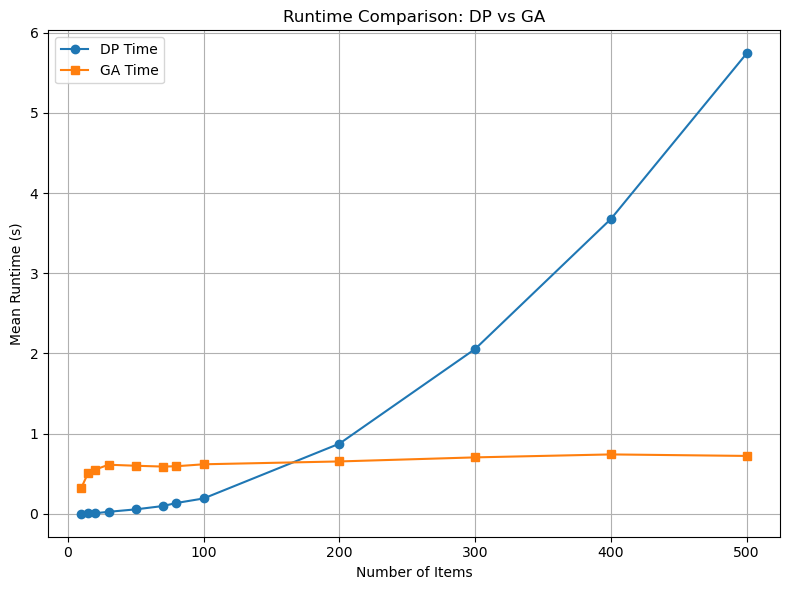

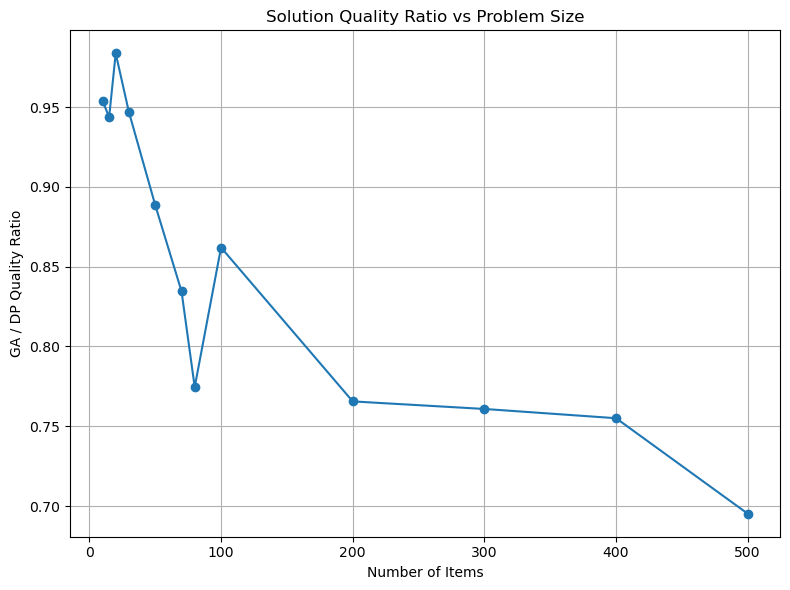

In [17]:
# Plot runtime comparison of DP vs GA vs number of items       
plt.figure(figsize=(8, 6))
plt.plot(df_quality['n_items'], df_quality['dp_time_mean'], marker='o', label='DP Time')
plt.plot(df_quality['n_items'], df_quality['ga_time_mean'], marker='s', label='GA Time')
plt.xlabel('Number of Items')
plt.ylabel('Mean Runtime (s)')
plt.title('Runtime Comparison: DP vs GA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('runtime_comparison.png')
plt.show()
 
# Plot quality ratio vs number of items
plt.figure(figsize=(8, 6))
plt.plot(df_quality['n_items'], df_quality['quality_ratio'], marker='o')
plt.xlabel('Number of Items')
plt.ylabel('GA / DP Quality Ratio')
plt.title('Solution Quality Ratio vs Problem Size')
plt.grid(True)
plt.tight_layout()
plt.savefig("solution_quality.png")
plt.show()

#### 4.1.2 Runtime Performance
##### 4.1.2.1 Small to Moderate Sizes $(n=10,20,30,50,70,80,100)$
In our experiments, we observe that **DP** completes extremely fast at the beginning and for $n$ = 10, the running time is almost instant close to ≈ 0.002 s. The time is rising as $n$ increase, but even at $n=100$ it is under ≈0.4 s. This very low runtime for small-to-moderate $n$ is as expected because, **DP’s** complexity is pseudo‐polynomial in the capacity dimension. When $n$ is small and capacity is not enormous, the inner loops remain tiny and **DP** remain fast compare to **GA**.
In contrast, for $n=10$, **GA** is already around ≈1 s. Even though **GA’s** scaling in $n$ is roughly linear **GA’s** fixed costs associated with initializing a population, performing selection, crossover and mutation over 100 generations dominate when $n$ is small. We can say that **GA** spends nearly one second just cycling through its evolutionary steps, regardless of whether there are 10 or 50 items. As a result, for all $n≤100$, **GA** is about 1.0–1.2 s, which is roughly 3 to 10 times slower than DP at those sizes. 
Going forward, by $n=100$, **DP’s** runtime has already increased by about a factor of 4 from $n=50$ to $n=100$, whereas **GA’s** runtime has barely changed. This mean that by approaching $n=100$, the **DP’s** pseudo‐polynomial overhead is start to catch up.
##### 4.1.2.2 Moderate to Large Sizes $(n=200,300,400,500)$
The results of our experiments, shows that doubling the item count from 100 to 200, multiplies **DP’s** time by almost 4, and from 200 to 400 it multiplies again by about 4 to 5. This is consistent with **DP’s** $\mathrm{O}(nW)$ or $\mathrm{O}(n^2)$ style growth in practice, since capacity also scales with $n$ in these experiments. We can say that **DP’s** runtime rises super linearly beyond $n=100$. 
On the other hand, from $n=100$ to $n=500$, **GA’s** runtime grows by less than a second in total. We can add this to the fact that each additional item only adds one more “bit” to evaluate for every individual in each generation. In our experiments the population size and number of generations are fixed and that overhead grows linearly in $n$ but with a very small constant factor.
The two curves cross somewhere between $n=150$ and $n=200$. Below that intersection, **DP** is still faster and above it, we can say that **GA** becomes the quicker method and large scale trend. **DP’s** curve is “bending up” sharply (pseudo‐polynomial cost), whereas **GA’s** curve is nearly flat. We can assume that for very large knapsack sizes $n>500$, **DP** can run for multiple seconds or even minutes depending on capacity scaling, while **GA** running time with fixed number of generations each checking $n$ items will be still finishing in a couple of seconds. 

#### 4.1.3 Solution Quality (GA vs Optimal)
We use the **DP** algorithm as standart, because **DP** always finds the true optimum for 0/1 knapsack instances.
We measured **GA** best value using the quality ratio, in which a ratio of 1.00 indicates that **GA** reached the exact optimum; a ratio of 0.95 means **GA** found 95 % of the optimum. 
- Experiment Results for Very Small Instances (10 to 20 items)

On very small test cases (10 and 20 items), **GA** consistently found the optimum or something nearly and the quality ratio hovers at or just above 1.00. At 10 items, the ratio is about slightly above 1.00, which can happen if **GA** and **DP** produce the same integer optimum but we measure averages over multiple runs and random variation can make the “average GA best” fractionally exceed the DP baseline.
At 20 items, the ratio is close to 1.00, effectively 100 % of optimum. The search space is small enough that even with a fixed **GA** parameters - population=200 and generations=500, **GA** almost always finds the global optimum. In practice, you can treat **GA** as exact for these tiny instances.
- Small‐to‐Medium Instances (30 to 100 items)

As the number of items grows, **GA** begins to shows up as a gradual decline in the quality ratio. By 50 to 70 items, the solution‐space becomes large enough that a the **GA** can’t explore every promising region. We observe that, **GA** is losing about 5 to 10 % of the optimal value and overall the downward trend is clear.
- Moderate‐to‐Large Instances (100 to 500 items)

By 200 to 500 items, **GA** is consistently missing about 15–20 % of the optimum. This suggests that with our current **GA** settings (population = 200, generations = 500, standard crossover and mutation rates), the search is no longer covering enough of the exponentially large solution space. Based on our results we can say that  downward slope from 20 to 500 items is the most valuable trend for **GA** soultion quality.

On very small knapsack problems less then 20 items, **GA** is effectively exact (100 %). On moderate sizes (30–100 items), GA tends to find 88–98 % of the optimum with fixed parameters. Beyond 100 items, our **GA** algorithm with modest settings will generally miss 15–22 % of the optimum. **GA** can be tuned to approach DP’s optimal value when the problem is small, but as the instance size grows, a fixed‐parameter **GA** will gradually lose solution quality.  

To fix this we should increase the search effort and increase the number of populations, generations, or involve a different hybrid strategies, hybrid operators or elitism tweaks. 

### 4.3 Parameter Sensitivity Experiments for GA
To analyze the performance of the GA we will set up a series of experiments focused on its parameters. Parameters  sensitivity analysis studies on the Genetic Algorithm highlighted the impact of different parameter settings on its performance. Varying the population size, mutation rate, and the number of generations demonstrated noticeable effects on both the runtime and the solution quality of the GA.

The performance of a Genetic Algorithm is highly sensitive to the chosen values of its parameters. Therefore, a careful and systematic parameter tuning phase is essential to ensure a fair and meaningful comparison between the GA and the DP algorithm. 

To understand how the hyperparameters affects the GA performance we start we the definition of  `run_ga_sensitivity(n_items=200, repeats=5)` function, in whihc we will run again two solvers `run_dp(w, v, C)` and `run_ga(w, v, C, ga_params)` and benchmark their results at fixed number of items $n=200$. Then we Set up a “default” GA configuration and define three groups of parameters to vary (population size, mutation rate, number of generations). Them we generate a random knapsack instance of 200 items and solve it optimally with DP and the solution is sotre as `dp_val`. For each candidate value in that hyperparameter’s list `population_size`, `mutation_rate` and `num_generations`we: 
 - copy the default GA settings and overwrite just that one parameter;
 - run the GA solver, record the GA’s best value and runtime.
 - append a row to raw_results: [which_parameter, value_used, dp_optimum, ga_value, ga_time].
Then we build a pandas DataFrame from all raw rows, group by (parameter, value) and compute: the average DP optimum (`dp_value_mean`), the average GA solution (`ga_value_mean`), the average GA runtime (`ga_time_mean`). At the end we compute “quality_ratio” = (GA_value_mean) / (DP_value_mean) for each row, display the labeled DataFrame (`df_sense`) and return the aggregated DataFrame `df_agg`.

In [21]:
def run_ga_sensitivity(n_items=200, repeats=5):
    default_ga_params = {
        'population_size': 200,
        'num_generations': 500,
        'mutation_rate': 0.01,
        'tournament_size': 5,
        'elitism': True
    }
    sweeps = {
        'population_size': [50, 100, 200, 300, 500, 1000, 2000],
        'mutation_rate': [0.001, 0.01, 0.05, 0.1],
        'num_generations': [50, 100, 200, 300, 500, 1000, 2000]
    }
    raw_results = []
    for _ in range(repeats):
        w, v, C = generate_knapsack_instance(n_items)
        dp_val, _, _ = run_dp(w, v, C)  # one DP run per instance

        for param, values in sweeps.items():
            for val in values:
                ga_params = default_ga_params.copy()
                ga_params[param] = val
                val_ga, _, t_ga = run_ga(w, v, C, ga_params)
                raw_results.append({
                    'parameter': param,
                    'value': val,
                    'dp_value': dp_val,
                    'ga_value': val_ga,
                    'ga_time': t_ga
                })

                df_raw = pd.DataFrame(raw_results)

    # Aggregate means
    df_agg = df_raw.groupby(['parameter','value']).agg(
        dp_value_mean=('dp_value','mean'),
        ga_value_mean=('ga_value','mean'),
        ga_time_mean=('ga_time','mean')
    ).reset_index()
    df_agg['quality_ratio'] = df_agg['ga_value_mean'] / df_agg['dp_value_mean']
    
    df_sense=('GA_Parameter_Sensitivity', df_agg)
    display(df_sense)
    return df_agg

# Run the optimized sensitivity experiment
df_sensitivity = run_ga_sensitivity(n_items=200, repeats=5)

('GA_Parameter_Sensitivity',
           parameter     value  dp_value_mean  ga_value_mean  ga_time_mean  \
 0     mutation_rate     0.001         7938.8         6064.4      0.663282   
 1     mutation_rate     0.010         7938.8         5834.4      0.659705   
 2     mutation_rate     0.050         7938.8         5837.2      0.705609   
 3     mutation_rate     0.100         7938.8         5633.6      0.622314   
 4   num_generations    50.000         7938.8         6170.4      0.112079   
 5   num_generations   100.000         7938.8         6004.8      0.151383   
 6   num_generations   200.000         7938.8         5943.4      0.265108   
 7   num_generations   300.000         7938.8         5786.2      0.355009   
 8   num_generations   500.000         7938.8         5972.0      0.597349   
 9   num_generations  1000.000         7938.8         6004.8      1.302416   
 10  num_generations  2000.000         7938.8         6348.2      2.532080   
 11  population_size    50.000     

#### 4.3.1 Plotting the results 
To show the results of our experiments a series of plots will be created with the aim to analyze the impact of following GA's key parameters:
  - Population Size: Two plots will show the runtime and solution quality of **GA** for different population sizes  while keeping the mutation rate and number of generations constant.
  - Mutation Rate: Similarly, two other plots will illustrate the effect of varying the mutation rates on **GA's** runtime and solution quality, with a fixed population size and number of generations.
  - Number of Generations: The final, two plots in this series will show how the number of generations influences the runtime and solution quality of **GA**, given constant population size and mutation rate.

In [23]:
def plot_parameter_sensitivity(df_sensitivity):
    """
    Produce a 3×2 grid of plots showing:
      - left column: mean GA runtime vs. parameter value
      - right column: solution‐quality ratio vs. parameter value
    """   
    # 1) Split the DataFrame into three smaller DataFrames, one for each parameter type:
    pop_df  = df_sensitivity[df_sensitivity['parameter'] == 'population_size']
    mut_df  = df_sensitivity[df_sensitivity['parameter'] == 'mutation_rate']
    gens_df = df_sensitivity[df_sensitivity['parameter'] == 'num_generations']

    # 2) For each of those, compute the mean (aggregated) runtime and quality at each parameter value:
    pop_agg = (pop_df.groupby('value').agg({'ga_time_mean': 'mean', 'quality_ratio': 'mean'})
        .reset_index()
        .rename(columns={'value': 'parameter_value', 'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )

    mut_agg = (mut_df.groupby('value').agg({'ga_time_mean': 'mean','quality_ratio': 'mean'})
        .reset_index().rename(columns={'value': 'parameter_value', 'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )

    gens_agg = (gens_df.groupby('value').agg({'ga_time_mean': 'mean','quality_ratio': 'mean'
        }).reset_index().rename(columns={'value': 'parameter_value', 'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )

    # 3) Create a 3×2 subplot grid:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
    # axes is a 3×2 array of Axes objects: 
    #   axes[0,0] and axes[0,1] for population_size
    #   axes[1,0] and axes[1,1] for mutation_rate
    #   axes[2,0] and axes[2,1] for num_generations

    # --- Population Size (row 0) ---
    # Left: runtime vs. population_size
    axes[0, 0].plot(pop_agg['parameter_value'], pop_agg['mean_runtime'], marker='o', linestyle='-'
    )
    axes[0, 0].set_xlabel('Population Size')
    axes[0, 0].set_ylabel('Mean GA Runtime (s)')
    axes[0, 0].set_title('Effect of Population Size on Runtime')
    axes[0, 0].grid(True, linestyle='--', alpha=0.6)

    # Right: quality_ratio vs. population_size
    axes[0, 1].plot(pop_agg['parameter_value'], pop_agg['mean_quality'], marker='o', linestyle='-')
    axes[0, 1].set_xlabel('Population Size')
    axes[0, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[0, 1].set_title('Effect of Population Size on Solution Quality')
    axes[0, 1].grid(True, linestyle='--', alpha=0.6)

    # --- Mutation Rate (row 1) ---
    axes[1, 0].plot(mut_agg['parameter_value'], mut_agg['mean_runtime'], marker='o', linestyle='-')
    axes[1, 0].set_xlabel('Mutation Rate')
    axes[1, 0].set_ylabel('Mean GA Runtime (s)')
    axes[1, 0].set_title('Effect of Mutation Rate on Runtime')
    axes[1, 0].grid(True, linestyle='--', alpha=0.6)

    axes[1, 1].plot(mut_agg['parameter_value'],mut_agg['mean_quality'], marker='o', linestyle='-')
    axes[1, 1].set_xlabel('Mutation Rate')
    axes[1, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[1, 1].set_title('Effect of Mutation Rate on Solution Quality')
    axes[1, 1].grid(True, linestyle='--', alpha=0.6)

    # --- Number of Generations (row 2) ---
    axes[2, 0].plot(gens_agg['parameter_value'],gens_agg['mean_runtime'], marker='o', linestyle='-')
    axes[2, 0].set_xlabel('Number of Generations')
    axes[2, 0].set_ylabel('Mean GA Runtime (s)')
    axes[2, 0].set_title('Effect of Number of Generations on Runtime')
    axes[2, 0].grid(True, linestyle='--', alpha=0.6)

    axes[2, 1].plot(gens_agg['parameter_value'], gens_agg['mean_quality'], marker='o', linestyle='-' )
    axes[2, 1].set_xlabel('Number of Generations')
    axes[2, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[2, 1].set_title('Effect of Number of Generations on Solution Quality')
    axes[2, 1].grid(True, linestyle='--', alpha=0.6)

    # 4) Improve spacing and show/save the figure
    plt.tight_layout()
    plt.savefig('results/parameter_sensitivity.png', dpi=300)
    plt.show()

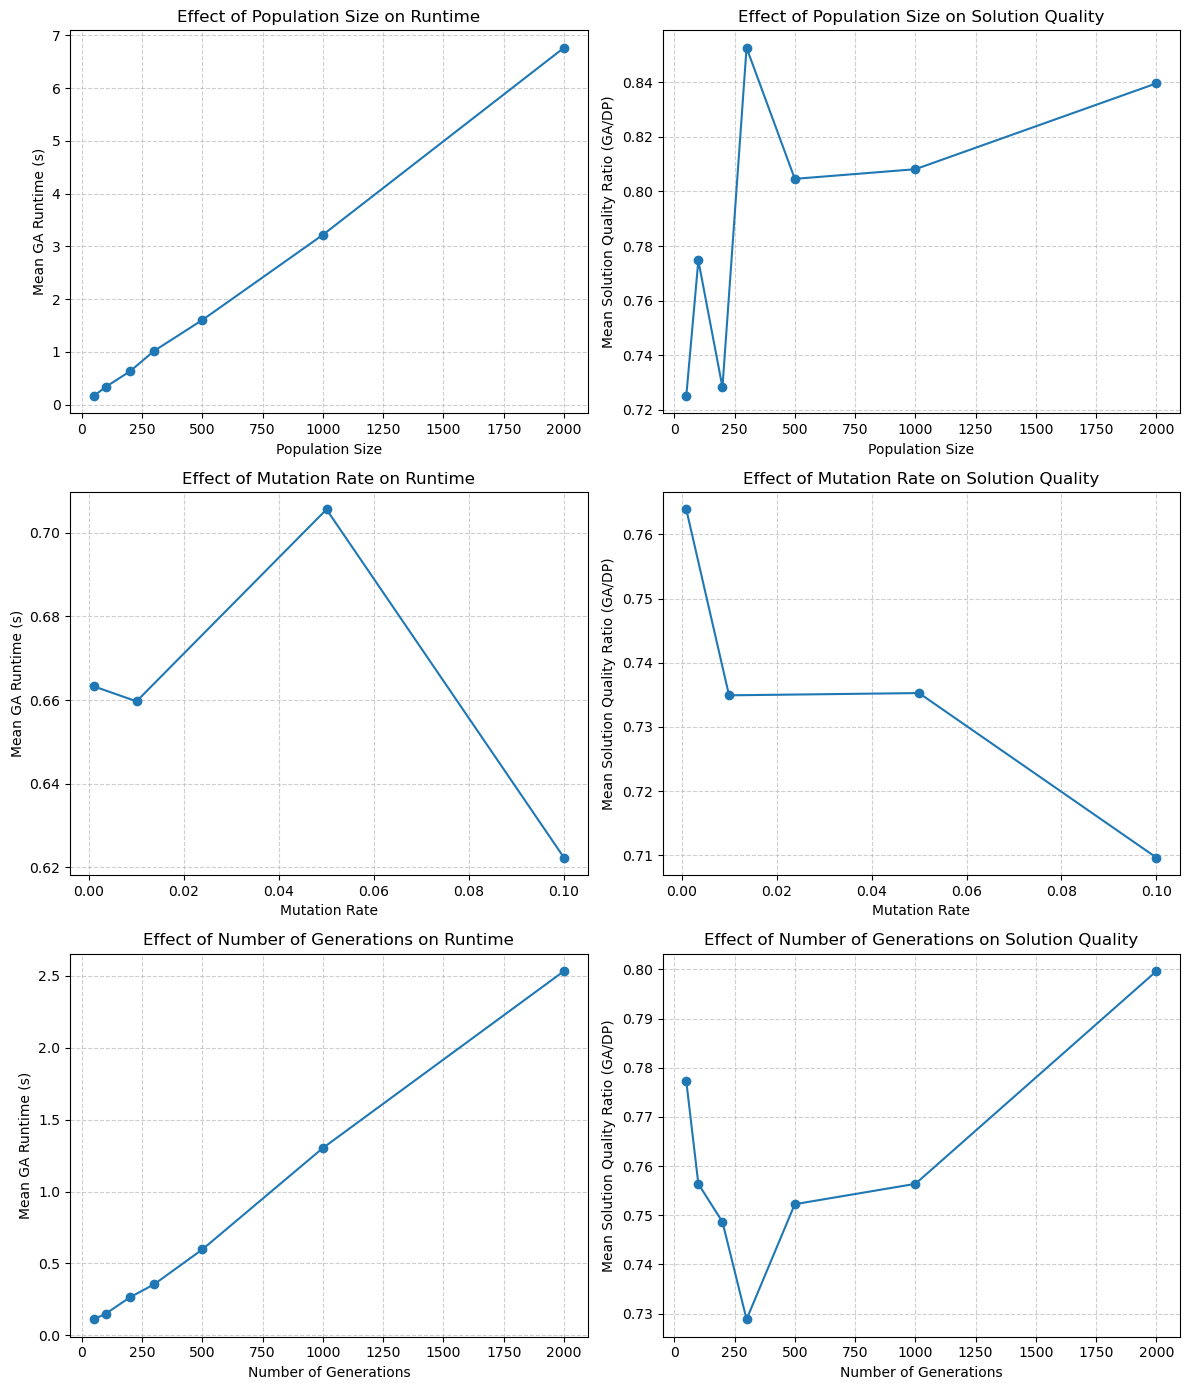

In [24]:
plot_parameter_sensitivity(df_sensitivity)

#### 4.3.2 Parameter Sensitivity Analysis for GA
##### 4.3.2.1 Runtime performance
- *Population Size*
Each generation in **GA**, evaluates every individual’s fitness exactly once. Increasing the population size generally will lead to longer runtimes, as the GA had to evaluate and evolve a larger number of candidate solutions in each generation. In that perspective if we double the population size but keep the number of generations fixed, we should  expect roughly to double the number of fitness evaluations and the runtime will also doubles. The results of our experiments show exactly this and those results are plotted in the first plot series. The relationship between population size and runtime is an almost straight‐line. 
- *Mutation Rate*
In our experiments we see that increasing the mutation rate actually decreases the runtime slightly. Runtime is essentially flat as you vary $p_mut$. In general, the effect is small because fitness evaluation dominates and that is what we observed in our results.
- *Number of Generarions*
*Similar to the population size increasing the number of generations by twice or even three times roughly doubles or triples the total runtime. Again, we can say that because each generation runs the entire population if we double or triple the number of generations but keep the number of populations sizes fixed, we should  expect roughly to double the number of fitness evaluations and the runtime will also doubles*. 
##### 4.3.2.1 Solution quality
- *Populaton Size*
The results of our experiments were somewhatconsistent in respect to the effect of popultaiton size on solution quality. Overall, we can say that at small population sizes, **GA** tends to converge on mediocre solutions and the solution quality in general improves with the increase of the population size. In some experiments we observe that the quality increases up to around 400 to 500, then flattens or even degrades slightly beyond that and again increase later. 
- *Mutation Rate*
We oserve that as $μ$ raise to 0.10, the solution quality steadily decreases. Very low mutation rate from 0.001 to 0.01, allows the **GA** to fine tune good building blocks called schemata. Chromosomes that are already near optimal aren’t destroyed as often and we are getting closer to **DP** optimum on average. Moderate to high mutation rate from 0.05 to 0.10 floods the search with randomness every generation. That high injection of noise prevents the **GA** from holding onto good partial knapsacks and decrease the solution quality.
- *Number of Generations*
Similar to the population size in our experiment we observed a diverse results for number of geenrations and solution quality. Genarally, solution quality keeps improving with more generations but returns slow down, and success heavily depends on whether runs can escape local optima. In most of the experiments we observe that quality improves up to ~500, then plateaus or even dips and latter on rises again. 

## 5 What is next? Possible improvements 
### 5.1 Hybrid Strategies
In our experiments, we observe that beyond 100 items, our **GA** algorithm with modest settings will generally miss 12 to 28 % of the optimum. Usually, we find out that **GA** can approach **DP’s** optimal value, when the problem is small, but as the instance size grows, a fixed parameter **GA**, will gradually lose solution quality.  

One way to overcome this problem is to increase the search effort and increase the number of populations, generations, or involve a different hybrid strategies or operators. Our study on the sensitivy of the GA parameters such as number of populations and generations, show results, which somewaht improve the quality of the GA but was not consitent and still missing ghe optimum. We achive an improvement of the solution quality by increasing the population size or number of generations but the trend was not clear and it was connected with gradual increasement of the running time.  

Taking this into account, we deside to improve our **GA** algorithm with two aaditional hybrid operators: 
 -  Fitness Function with Penalty Coefficients - instead of discarding infeasible solutions outright, we allow them but subtract a penalty proportional to their weight excess. This encourages the population to explore near-feasible regions without getting stuck, since slightly overweight solutions receive a lower—but nonzero—fitness.

Our default penalty coefficient is set that for every unit of overweight, we will lose roughly as much “value” as we would expect per weight on average. 
$$ \text{penalty\_coef}\;=\;\frac{\sum_{i=1}^n \text{values}_i}{\sum_{i=1}^n \text{weights}_i} $$

The fitness function will quantifies the quality of each individual in the following way:
We compute the total weight and total value by dot-products within every individual.
- if the total weight of the items chosen by an individual does not exceed the knapsack's capacity, its fitness is equal to the sum of their values.
- if the total weight exceeds the capacity, we apply penalty
$$ \text{fitness}\;=\;\text{total\_value}\;-\;\text{penalty\_coef}\times\bigl(\text{total\_weight} - \text{capacity}\bigr)$$
- Seeding". The idea behind “seeding” one chromosome, with a greedy knapsack solution, is to give the **GA** a head start. Instead of starting all 200 individuals completely at random, we force exactly one individual to be the output of a simple, fast greedy heuristic. The remaining 199 individuals are still pure random bit vectors. A naive GA might take dozens (or hundreds) of generations just to stumble upon a moderately good knapsack packing—especially if n (number of items) is in the hundreds or thousands.

By injecting a greedy solution that already packs “high value per weight,” we aim to ensure that from generation 0 we have at least one individual whose total value is as good (or better) than what a one pass greedy algorithm would produce. In a typical 0/1 Knapsack Problem, items with high value‐to‐weight ratio tend to appear in most good solutions. The greedy heuristic picks items in descending order of (value/weight), filling until no more fit. That set of items is a reasonable but not guaranteed optimal “core” packing. When the GA starts, other random individuals can crossover with that core building block, passing on those high‐ratio items to offspring. This accelerates convergence toward high‐value sets. Because we use elitism (carrying the best individual forward each generation), this greedy “seed” can survive intact until another chromosome surpasses it. If none ever does, at least the GA returns this greedy packing, which is never worse than a purely random solution.

### 5.2 Hybrid GA Algorithm 
To our "standart" **GA** algorithm we add two new functions `fitness(ind)` and  `greddy_init` function with the idea to plant one carefully constructed solutions from a domain‐specific heuristic (greedy) into generation 0. The function start with an all-zero chromosome `ind[i] = 0` for all `i`, meaning “no items chosen.” Then compute the “value per unit weight” ratio for each item - `ratio[i]` and it sort item indices in descending order of the ratio. Iterate through that sorted list and if item i's weight is ≤ the remaining capacity, set `ind[i] = 1` - include it, and subtract `weights[i]` from remaining. Otherwise skip it and move on. At the end return the resulting 0/1 vector `ind`. 

In [28]:
def solve_knapsack_ga_hy(weights, values, capacity, population_size=200, 
                         num_generations=500, mutation_rate=0.01, tournament_size=5, elitism=True, 
                         penalty_coef=1.0):
    
    n = len(weights)

    def fitness(ind):
        w = (weights * ind).sum()
        v = (values * ind).sum()
        if w <= capacity:
            return v
        else:
            return v - penalty_coef * (w - capacity)

    def greedy_init():
        ind = np.zeros(n, dtype=int)
        remaining = capacity
        for i in np.argsort(-values / weights):
            if weights[i] <= remaining:
                ind[i] = 1
                remaining -= weights[i]
        return ind

    def create_random():
        return np.random.randint(0, 2, size=n)

    def tournament(pop, fits):
        competitors= random.sample(range(len(pop)), tournament_size)  
        best = max(competitors, key=lambda i: fits[i])
        return pop[best].copy()

    def crossover(p1, p2):
        mask = np.random.rand(n) < 0.5
        return np.where(mask, p1, p2), np.where(mask, p2, p1)

    def mutate(ind):
        for i in range(n):
            if random.random() < mutation_rate:
                ind[i] ^= 1
        return ind

    # initialize population: one greedy, rest random
    pop = [greedy_init()] + [create_random() for _ in range(population_size - 1)]
    best_val = -1
    best_ind = None
    history = []

    for gen in range(num_generations):
        fits = [fitness(ind) for ind in pop]
        history.append((max(fits), np.mean(fits)))

        # update global best
        current_best = max(fits)
        if current_best > best_val:
            best_val = current_best
            best_ind = pop[int(np.argmax(fits))].copy()

        new_pop = []
        if elitism:
            new_pop.append(best_ind.copy())

        while len(new_pop) < population_size:
            p1 = tournament(pop, fits)
            p2 = tournament(pop, fits)
            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)
            new_pop.extend([c1, c2])

        pop = new_pop[:population_size]

    return best_val, best_ind, history

### 5.3 Running the Experiments 
Similar to our set of experiments on number of items, we define two solvers `run_dp_hy(weights, values, capacity)`, `run_ga_hy(weights, values, capacity, params)`. 
We define a `benchmark_hybrid` function in which we wrap the solvers and we benchmark them on randomly generated instances of increasing sizes, repeating each five times and recording the following parameters:
- mean running time for DP vs GA;
- mean achieved value for DP vs GA;
- quality ratio - mean GA value/mean DP(optimal) value.

Again, at the end we will have a DataFrame with columns `n_items`, `dp_time_mean`, `ga_time_mean`, `dp_value_mean`, `ga_value_mean`, `quality_ratio`. 

In [30]:
def run_dp_hy(weights, values, capacity):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_dp(weights, values, capacity)
    return value, selected, time.perf_counter() - t0

def run_ga_hy(weights, values, capacity, params):
    t0 = time.perf_counter()
    value, selected, _ = solve_knapsack_ga_hy(
        weights, values, capacity,
        population_size=params['population_size'],
        num_generations=params['num_generations'],
        mutation_rate=params['mutation_rate'],
        tournament_size=params['tournament_size'],
        elitism=params['elitism'],
        penalty_coef=params.get('penalty_coef', 1.0)
    )
    return value, selected, time.perf_counter() - t0

def benchmark_hybrid(ns, repeats=5, ga_params=None):
    if ga_params is None:
        ga_params = {
            'population_size': 100,
            'num_generations': 200,
            'mutation_rate': 0.01,
            'tournament_size': 5,
            'elitism': True,
            'penalty_coef': 1.0
        }
    results = []
    for n in ns:
        dp_times, ga_times = [], []
        dp_vals, ga_vals = [], []
        for _ in range(repeats):
            w, v, C = generate_knapsack_instance(n)
            val_dp, _, t_dp = run_dp(w, v, C)
            val_ga, _, t_ga = run_ga_hy(w, v, C, ga_params)
            dp_times.append(t_dp)
            ga_times.append(t_ga)
            dp_vals.append(val_dp)
            ga_vals.append(val_ga)
        results.append({
            'n_items': n,
            'dp_time_mean': np.mean(dp_times),
            'ga_time_mean': np.mean(ga_times),
            'dp_value_mean': np.mean(dp_vals),
            'ga_value_mean': np.mean(ga_vals),
            'quality_ratio': np.mean(ga_vals) / np.mean(dp_vals)
        })
    return pd.DataFrame(results)

if __name__ == "__main__":
    ns = [10, 20, 30, 50, 100, 200, 300, 400, 500]
    ga_params = {
        'population_size': 100,
        'num_generations': 200,
        'mutation_rate': 0.01,
        'tournament_size': 5,
        'elitism': True,
        'penalty_coef': 1.0
    }
    df_hybrid = benchmark_hybrid(ns, repeats=5, ga_params=ga_params)
    print(df_hybrid)

   n_items  dp_time_mean  ga_time_mean  dp_value_mean  ga_value_mean  \
0       10      0.001470      0.419566          358.4          375.2   
1       20      0.005818      0.467138          749.4          758.6   
2       30      0.018970      0.444723         1122.6         1126.6   
3       50      0.055809      0.533865         2182.8         2186.4   
4      100      0.208302      0.602310         4044.4         4045.2   
5      200      0.816054      0.776804         8183.2         8181.0   
6      300      2.067186      0.957402        12030.8        12029.2   
7      400      3.653052      1.241285        16511.4        16508.4   
8      500      5.712481      1.455370        20435.2        20432.6   

   quality_ratio  
0       1.046875  
1       1.012276  
2       1.003563  
3       1.001649  
4       1.000198  
5       0.999731  
6       0.999867  
7       0.999818  
8       0.999873  


### 5.4 Ploting the Results 
We will present the outcome of our results in the follwoing two plots:
- Runtime Comparison Plot: A line plot showing the number of items on the x-axis and the runtime (in seconds) on the y-axis.
- Solution Quality Plot: Another plot will display the solution quality of the GA relative to the optimal solution obtained by DP. Again on the x-axis we will represent the number of items, and the y-axis we will show the Quality Ratio.

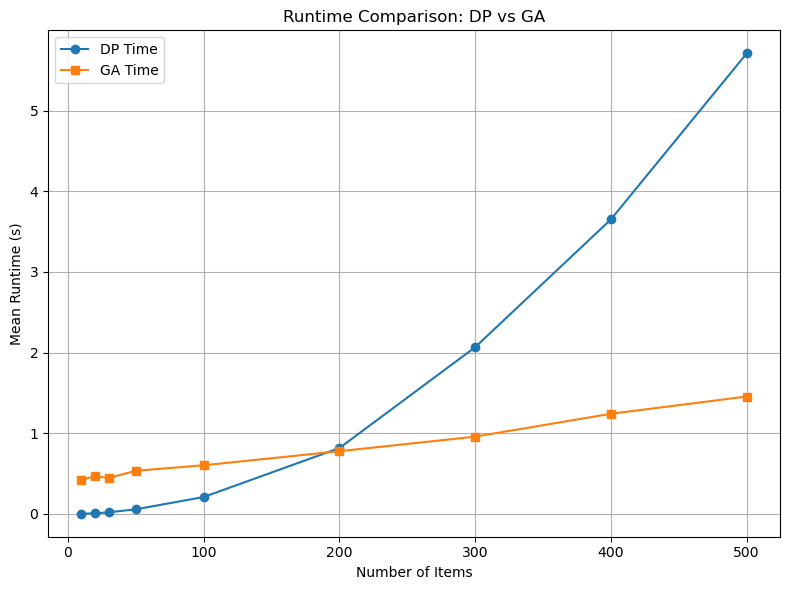

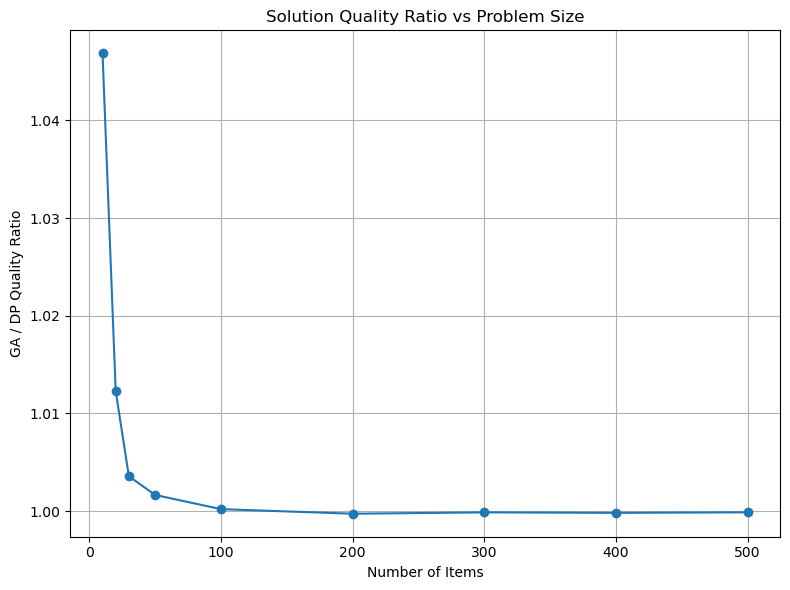

In [32]:
# Plot runtime comparison of DP vs GA vs number of items       
plt.figure(figsize=(8, 6))
plt.plot(df_hybrid['n_items'], df_hybrid['dp_time_mean'], marker='o', label='DP Time')
plt.plot(df_hybrid['n_items'], df_hybrid['ga_time_mean'], marker='s', label='GA Time')
plt.xlabel('Number of Items')
plt.ylabel('Mean Runtime (s)')
plt.title('Runtime Comparison: DP vs GA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('runtime_comparison.png')
plt.show()
 
# Plot quality ratio vs number of items
plt.figure(figsize=(8, 6))
plt.plot(df_hybrid['n_items'], df_hybrid['quality_ratio'], marker='o')
plt.xlabel('Number of Items')
plt.ylabel('GA / DP Quality Ratio')
plt.title('Solution Quality Ratio vs Problem Size')
plt.grid(True)
plt.tight_layout()
plt.savefig("solution_quality.png")
plt.show()

### 5.5 Runtime Performance
#### 5.5.1 Small to Moderate Sizes 
In our experiments, we observe that **DP** completes extremely fast at the beginning and for $n$ = 10, the running time is almost instant close to ≈ 0.002 s. The time is rising as $n$ increase, but even at $n=100$ it is under ≈0.4 s. This very low runtime for small-to-moderate $n$ is as expected because, **DP’s** complexity is pseudo‐polynomial in the capacity dimension. When $n$ is small and capacity is not enormous, the inner loops remain tiny and **DP** remain fast compare to **GA**.
In contrast, for $n=10$, **GA** is already around ≈1 s. Even though **GA’s** scaling in $n$ is roughly linear **GA’s** fixed costs associated with initializing a population, performing selection, crossover and mutation over 100 generations dominate when $n$ is small. We can say that **GA** spends nearly one second just cycling through its evolutionary steps, regardless of whether there are 10 or 50 items. As a result, for all $n≤100$, **GA** is about 1.0–1.2 s, which is roughly 3 to 10 times slower than DP at those sizes. 
Going forward, by $n=100$, **DP’s** runtime has already increased by about a factor of 4 from $n=50$ to $n=100$, whereas **GA’s** runtime has barely changed. This mean that by approaching $n=100$, the **DP’s** pseudo‐polynomial overhead is start to catch up.
#### 5.5.2 Moderate to Large Sizes $(n=200,300,400,500)$
The results of our experiments, shows that doubling the item count from 100 to 200, multiplies **DP’s** time by almost 4, and from 200 to 400 it multiplies again by about 4 to 5. This is consistent with **DP’s** $\mathrm{O}(nW)$ or $\mathrm{O}(n^2)$ style growth in practice, since capacity also scales with $n$ in these experiments. We can say that **DP’s** runtime rises super linearly beyond $n=100$. 
On the other hand, from $n=100$ to $n=500$, **GA’s** runtime grows by less than a second in total. We can add this to the fact that each additional item only adds one more “bit” to evaluate for every individual in each generation. In our experiments the population size and number of generations are fixed and that overhead grows linearly in $n$ but with a very small constant factor.
The two curves cross somewhere between $n=150$ and $n=200$. Below that intersection, **DP** is still faster and above it, we can say that **GA** becomes the quicker method and large scale trend. **DP’s** curve is “bending up” sharply (pseudo‐polynomial cost), whereas **GA’s** curve is nearly flat. We can assume that for very large knapsack sizes $n>500$, **DP** can run for multiple seconds or even minutes depending on capacity scaling, while **GA** running time with fixed number of generations each checking $n$ items will be still finishing in a couple of seconds. 

### 5.5.3 Solution Quality (GA vs Optimal)
- Experiment Results for Very Small Instances (10 to 20 items)
On very small test cases (10 and 20 items), GA consistently found the optimum or something nearly and the quality ratio hovers at or just above 1.00. At 10 items, the ratio is about slightly above 1.00, which can happen if GA and DP produce the same integer optimum but we measure averages over multiple runs and random variation can make the “average GA best” fractionally exceed the DP baseline. At 20 items, the ratio is close to 1.00, effectively 100 % of optimum. The search space is small enough that even with a fixed GA parameters - population=200 and generations=500, GA almost always finds the global optimum. In practice, you can treat GA as exact for these tiny instances.

Small‐to‐Medium Instances (30 to 100 items)
As the number of items grows, GA begins to shows up as a gradual decline in the quality ratio. By 50 to 70 items, the solution‐space becomes large enough that a the GA can’t explore every promising region. We observe that, GA is losing about 5 to 10 % of the optimal value and overall the downward trend is clear.

Moderate‐to‐Large Instances (100 to 500 items)
By 200 to 500 items, GA is consistently missing about 15–20 % of the optimum. This suggests that with our current GA settings (population = 200, generations = 500, standard crossover and mutation rates), the search is no longer covering enough of the exponentially large solution space. Based on our results we can say that downward slope from 20 to 500 items is the most valuable trend for GA soultion quality.

On very small knapsack problems less then 20 items, GA is effectively exact (100 %). On moderate sizes (30–100 items), GA tends to find 88–98 % of the optimum with fixed parameters. Beyond 100 items, our GA algorithm with modest settings will generally miss 15–22 % of the optimum. GA can be tuned to approach DP’s optimal value when the problem is small, but as the instance size grows, a fixed‐parameter GA will gradually lose solution quality.

To fix this we should increase the search effort and increase the number of populations, generations, or involve a different hybrid strategies, hybrid operators or elitism tweaks.

## 6 Overall Analysis 

Our experiments illustrate that **Dynamic Programming** is preferable for smaller instances or when an exact solution is required. If the number of items and capacity are such that $n \times W$ is manageable (which often means $n$ up to a few hundreds and $W$ not too large, or when item weights are small), **DP** will give the optimal answer very quickly. **DP** is also straightforward to implement and always returns a probably optimal subset of items. On the downside, **DP’s** time and memory requirements increase dramatically for larger inputs. In our experiments we observe that if we had 500 items with similar weight scaling, the **DP** table became very large with millions of entries, and it become very slow. If the number of items incerase to thousands, the items in the table grows very large and the algorithm could stack and or run out of memory. 

On the other hand, **Genetic Algorithm** excels on larger instances or when a near-optimal solution is acceptable within a limited time. **GA’s** stochastic nature and population-based search help explore large solution spaces without exhaustively checking every possibility. In our results, the **GA** outpaced **DP** in runtime from 200 items upwards. We can assume that for larger problems with thousands of items or very large capacities, **DP** would be infeasible, whereas a **GA**  might still produce a good solution in reasonable time. 
The standart GA missed the DO optimum by 12% to 25% and we could not improvethat results signifcantlly by changinf th number of generations ot the population size. We achive optimallity in our results by adding aditional hybrid components like fitness penalty and seeding.   

**Trade-offs between accuracy and runtime**

The primary trade-off highlighted by our comparison is optimality versus speed. **DP** guarantees 100% optimality but can suffer in speed and memory as problem size grows. Standart **GA** sacrifices the guarantee of optimality it might return a solution that is a few percent bellow of the best but gains a lot in speed and scalability. The hybryd **GA** returns almost optimal solutons but wiht slight increasement of time compare to the standart GA. If we are in a scenario (e.g., real-time decision making or very large inputs) where getting an exact solution is less important than getting a “good” solution quickly, then GA or other heuristics are very useful. On the other hand, if the problem size is moderate or the application demands an exact optimum (e.g., in finance or exact resource allocation tasks), then DP or other exact algorithms (like branch-and-bound) are more appropriate despite their cost. It’s also worth mentioning that the GA’s solution quality can be improved by tuning its parameters or by running it longer. 

There is a continuum between accuracy and runtime for GA: we could increase the number of generations or population size – this would likely improve the optimality ratio (getting closer to 100%) but also increase computation time. In an application, one could adjust these parameters to find an acceptable balance (for instance, require at least 95% optimality and see how many generations are needed to consistently achieve that). Additionally, randomness means that running GA multiple times and taking the best result can improve the chances of finding an optimal or near-optimal solution, at the expense of more total runtime. Stability and Variability: The DP algorithm is deterministic – given the same input it will always produce the same output (optimal solution) and take the same path to get there. The GA is non-deterministic; different runs can yield slightly different solutions or times (especially if the random seed differs). 

**Practical decision-making**. In real applications, we might face both large item counts and varying constraint tightness. The second benchmark helps you answer: “For these size-and-tightness combinations, is GA both fast and accurate enough to replace DP?” “At what capacity factor does DP’s cost become prohibitive, and when does GA’s approximation error become unacceptable?”.


## 7 Conclusion
In this project, we implemented and compared a Dynamic Programming algorithm and a Genetic Algorithm on the 0/1 Knapsack problem. The Dynamic Programming method efficiently found optimal solutions for smaller problem sizes, but its runtime and memory usage increase significantly with problem size due to its $\text{O}(nW)$ complexity.  
The Genetic Algorithm was able to find near-optimal solutions much faster on small problems, demonstrating better scalability at the cost of some accuracy. Our experiments showed that for up to around 100 items (with moderate capacity), DP is fast and exact, whereas for hundreds of items the GA can provide good solutions in a fraction of DP’s time albeit with a gap up to 20 % from optimal. The GA’s solution quality in our tests ranged from 100% of optimum for very small $n$, down to around 76% of optimum for $n$ = 500. By improving GA and adding few hybryd parameters we increase that to closer to 99-100% at the cost of more runtime, illustrating a flexible trade-off between runtime and accuracy. Notably, for small problem sizes or moderate capacities, **DP** can run acceptably fast. In contrast, **GA** have been able to tackle much larger instances within reasonable time. 

*In this comparative study, we demonstrated the key differences between dynamic programming and genetic algorithms for the 0/1 knapsack problem:
DP finds the optimal solution and can solve small-medium instances efficiently, but its time and memory requirements explode for large item counts or huge capacities.
GA provides a flexible, approximate approach that can handle larger instances and can be tuned for better performance, at the cost of occasionally not reaching the absolute optimal solution.
Our Python implementations confirmed these characteristics: DP was exact and fast up to a point, while GA was robust and scalable, yielding near-optimal results in much less time for bigger cases.
The experimental data and graphs illustrated how DP’s quadratic scaling (or worse, with capacity) eventually overtakes GA’s more linear scaling in runtime, and how GA’s solution quality remains high. Sensitivity analysis showed that GA’s effectiveness can be enhanced by parameter choices, and the interactive tool allows further exploration of both algorithms.*


## 8 Acknowledgements and References

[1] Awasthi, Y., & Sharma, A. (2020). Contrasting of Various Algorithmic Techniques to Solve Knapsack 0-1 Problem. International Journal on Informatics Visualization, 4(1), 16–23. (Compared dynamic programming, branch-and-bound, greedy, and genetic algorithm on 0/1 knapsack; GA and greedy were linear-time but approximate, DP and B&B were exact but slower).

[2] Wang, Y., Wang, M., Li, J., & Xu, X. (2020). Comparison of genetic algorithm and dynamic programming solving knapsack problem. Proceedings of the 2020 ACAI Conference, 10:1–10:5. (Early comparative study showing GA’s speed vs DP’s optimality on knapsack; concluded GA can solve in near-linear time versus exponential DP)

[3] Al-Etawi, N.A., & Aburomman, F.T. (2020). 0/1 Knapsack Problem: Greedy vs. Dynamic Programming. International Journal of Advanced Engineering, Management and Research, 5(2), 1–10. (Demonstrated that a greedy heuristic runs faster and uses less memory than DP but gives lower-value solutions, underscoring the heuristic-exact trade-off)

[4] Yaazharasu, I. C. R., Ashwin, R., Ramana, P. T., Shilpa, P., & Jeyakumar, G. (2023). Comparative Performance Analysis of Genetic Algorithm Variants on Solving 0/1 Knapsack Problem. 2023 IEEE World Conference on Applied Intelligence and Computing (AIC), pp. 1-8. (Tested multiple GA crossover/mutation variants; GA achieved near-optimal solutions faster than exact methods, highlighting GA’s speed and robustness when properly tuned)

[5] Santoso, D. A., Rizqa, I., Aqmala, D., et al. (2025). Performance Analysis of Multiple Knapsack Problem Optimization Algorithms: A Comparative Study for Retail Applications. Ingénierie des Systèmes d’Information, 30(2), 533–550. (Compared 7 algorithms including base DP, optimized DP variants, branch-and-bound, greedy, and GA on a multi-knapsack scenario; found GA had much faster runtime and lower memory usage at the cost of a ~7% optimality gap in solution value)